In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
diabetes = pd.read_csv('diabetes.csv')
display(diabetes)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
duplicates = diabetes[diabetes.duplicated()]

# Print or handle the duplicates as needed
if not duplicates.empty:
    print("Duplicate rows found:")
    display(duplicates)
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


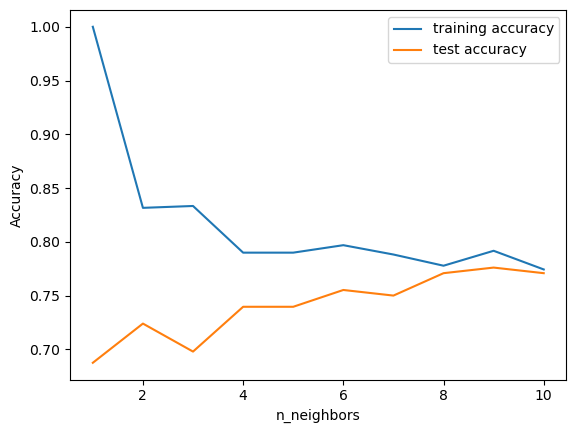

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.loc[:, diabetes.columns != 'Outcome'], diabetes['Outcome'], stratify=diabetes['Outcome'], random_state=66)
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(knn.score(X_train, y_train))
    # record test set accuracy
    test_accuracy.append(knn.score(X_test, y_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

In [5]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.79
Accuracy of K-NN classifier on test set: 0.78


In [6]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.714


In [7]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.773
Accuracy on test set: 0.740


In [8]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.04554275 0.6830362  0.         0.         0.         0.27142106
 0.         0.        ]


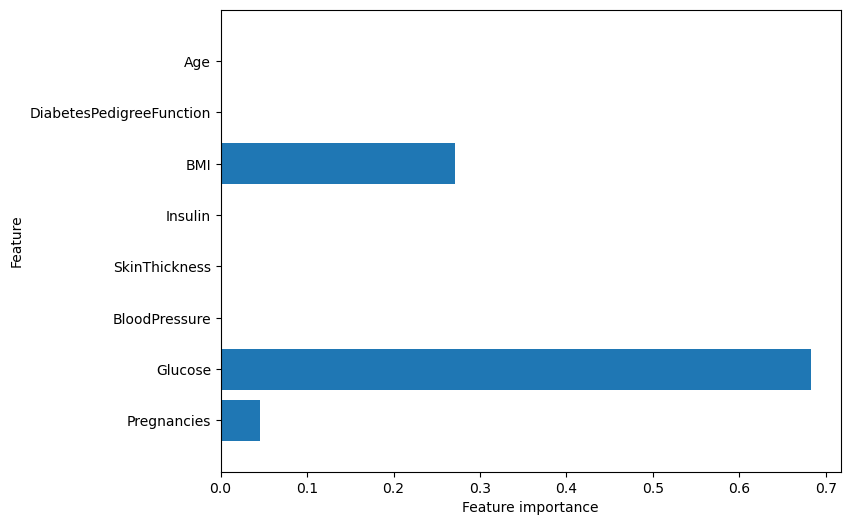

In [9]:
diabetes_features = diabetes.columns[:-1]
def plot_feature_importances_diabetes(model):
    plt.figure(figsize=(8,6))
    n_features = 8
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances_diabetes(tree)

In [10]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.73
Accuracy on test set: 0.72


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.823
Accuracy on test set: 0.802


E:\ProgramData\anaconda3\envs\MSBANA\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [12]:
mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
    mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.806
Accuracy on test set: 0.797


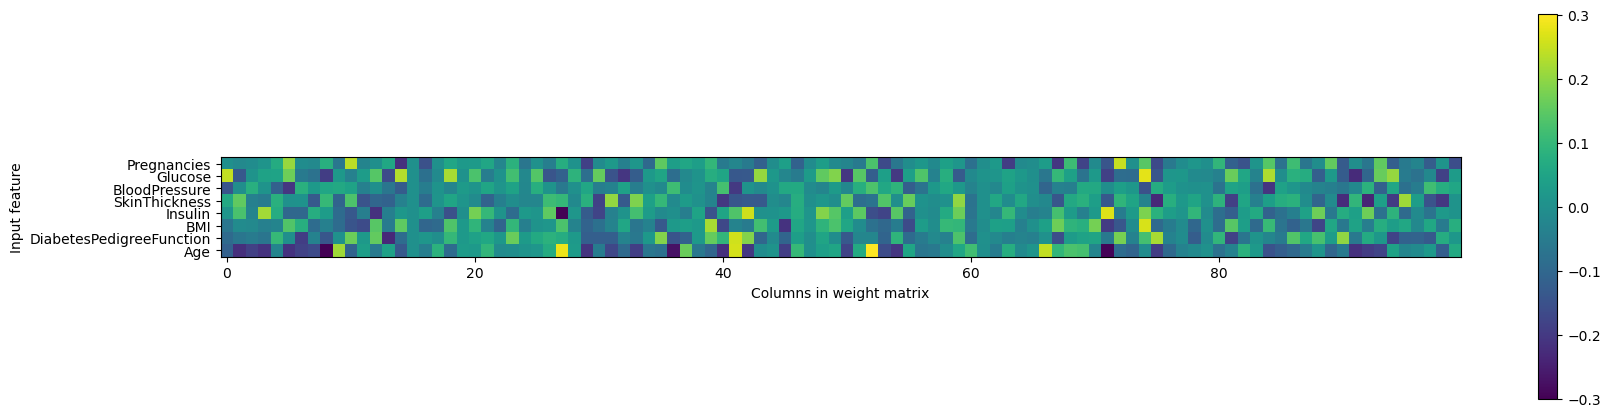

In [13]:
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(8), diabetes_features)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Check for missing values
diabetes_df = pd.read_csv('diabetes.csv')
missing_values = diabetes_df.isnull().sum()

# Define features and target variable
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions and evaluate the model
predictions = model.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)

accuracy, report

(0.7467532467532467,
 '              precision    recall  f1-score   support\n\n           0       0.81      0.79      0.80        99\n           1       0.64      0.67      0.65        55\n\n    accuracy                           0.75       154\n   macro avg       0.73      0.73      0.73       154\nweighted avg       0.75      0.75      0.75       154\n')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import statsmodels.api as sm
import pandas as pd

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Splitting the dataset into training and testing sets
X = data.drop('Outcome', axis=1)  # Predictor variables
y = data['Outcome']               # Response variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adding constant for statsmodels
X_sm = sm.add_constant(X_train)
logit_model = sm.Logit(y_train, X_sm)

# Fitting the model
result = logit_model.fit()

# Displaying the summary of the model
result_summary = result.summary()
result_summary

Optimization terminated successfully.
         Current function value: 0.467835
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  614
Model:                          Logit   Df Residuals:                      605
Method:                           MLE   Df Model:                            8
Date:                Sat, 09 Mar 2024   Pseudo R-squ.:                  0.2752
Time:                        19:12:27   Log-Likelihood:                -287.25
converged:                       True   LL-Null:                       -396.34
Covariance Type:            nonrobust   LLR p-value:                 9.311e-43
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -9.0359      0.837    -10.802      0.000     -10.675      -7.396
Pregnancies                  0.0645      0.036      1.791      0.073      -0.006       0.135
Glucose                      0.0341      0.004      8.055      0.000       0.026       0.042
BloodPressure               -0.0139      0.006     -2.260      0.024      -0.026      -0.002
SkinThickness                0.0031      0.008      0.397      0.691      -0.012       0.019
Insulin                     -0.0018      0.001     -1.782      0.075      -0.004       0.000
BMI                          0.1026      0.017      5.948      0.000       0.069       0.136
DiabetesPedigreeFunction     0.6945      0.330      2.107      0.035       0.049       1.341
Age                          0.0371      0.011      3.400      0.001       0.016       0.058
============================================================================================
"""

In [16]:
from itertools import combinations
import numpy as np

def calculate_bic(y, X):
    """
    Function to calculate the Bayesian Information Criterion for a given model.
    """
    model = sm.Logit(y, X).fit(disp=0)
    bic = model.bic
    return bic, model

def step_bic_selection(y, X):
    """
    Performs a stepwise selection based on the BIC criterion.
    
    Parameters:
    - y: The dependent variable
    - X: The independent variables (predictors)
    
    Returns:
    - The model with the lowest BIC and its BIC value.
    """
    best_bic = np.inf
    best_model = None
    
    # Iterate over all possible combinations of predictors
    for k in range(1, len(X.columns) + 1):
        for combo in combinations(X.columns, k):
            X_combo = sm.add_constant(X[list(combo)])
            bic, model = calculate_bic(y, X_combo)
            
            if bic < best_bic:
                best_bic = bic
                best_model = model
                
    return best_bic, best_model

# Perform the stepwise BIC selection process
best_bic, best_model = step_bic_selection(y, X)

# Display the summary of the best model
best_model_summary = best_model.summary()
best_model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      763
Method:                           MLE   Df Model:                            4
Date:                Sat, 09 Mar 2024   Pseudo R-squ.:                  0.2609
Time:                        19:12:28   Log-Likelihood:                -367.15
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 6.857e-55
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -8.4159      0.657    -12.811      0.000      -9.703      -7.128
Pregnancies                  0.1419      0.027      5.236      0.000       0.089       0.195
Glucose                      0.0338      0.003     10.112      0.000       0.027       0.040
BMI                          0.0781      0.014      5.671      0.000       0.051       0.105
DiabetesPedigreeFunction     0.9013      0.292      3.090      0.002       0.330       1.473
============================================================================================
"""

In [17]:
import joblib

# Load the saved model
loaded_model = joblib.load('diabetes_logistic_regression_model.joblib')

In [18]:
import streamlit as st
import statsmodels.api as sm
import pandas as pd
import numpy as np
import joblib

# Load the logistic regression model
model = joblib.load('diabetes_logistic_regression_model.joblib')

# Streamlit app title
st.title('Diabetes Prediction App')

# Creating user input fields
pregnancies = st.number_input('Pregnancies', min_value=0)
glucose = st.number_input('Glucose', min_value=0)
bmi = st.number_input('BMI', min_value=0.0, format="%.2f")
dpf = st.number_input('Diabetes Pedigree Function', min_value=0.0, format="%.2f")

# Predict button
if st.button('Predict'):
    # Create a dataframe from the inputs
    features = pd.DataFrame({
        'Pregnancies': [pregnancies],
        'Glucose': [glucose],
        'BMI': [bmi],
        'DiabetesPedigreeFunction': [dpf]
    })
    # Add a constant for the intercept
    features_with_const = sm.add_constant(features, has_constant='add')
    
    # Making prediction
    prediction_prob = model.predict(features_with_const)
    prediction = prediction_prob >= 0.5  # Using 0.5 as the threshold for prediction
    
    # Display the prediction
    st.subheader('Diabetes Prediction:')
    if prediction[0]:
        st.write("The person is likely diabetic.")
    else:
        st.write("The person is likely not diabetic.")

2024-03-09 19:12:29.489 
  command:

    streamlit run E:\ProgramData\anaconda3\envs\MSBANA\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
